## Get Distributions of Beta Values for IRT Models

Used to Generate Fig 3

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats
from tqdm.notebook import tqdm
from glob import glob
from matplotlib import pyplot as plt

import Regressions as reg
import DataBuild as db

No w2v was able to load


In [2]:
BETAS_ORDER = ['output_pos', 'total_recalls', 'lag',
             'sem', 'session', 'lag_sem', 'irt-1', 'irt-2']

In [4]:
sd = 3

In [3]:
def abbrv(beta):
    """returns abbreviated name for beta param"""
    if beta == 'session': return 'SESS'
    if beta == 'lag': return 'LAG'
    if beta == 'sem': return 'SIM'
    if beta == 'total_recalls': return 'R'
    if beta == 'lag_sem': return 'SIMxLAG'
    if beta == 'output_pos': return 'OP'
    if beta == 'irt-1': return 'IRT₋₁'
    if beta == 'irt-2': return 'IRT₋₂'
    return beta

In [5]:
def get_betas(subjs, **kwargs):
    """Returns all betas, pvals and r^2s for the subjects given. """
    
    r2s = []
    betas = pd.DataFrame()
    pvals = pd.DataFrame()

    for subject in tqdm(subjs):
        model = reg.get_model(subject=subject, **kwargs)
        betas[subject] = model.params
        pvals[subject] = model.pvalues
        r2s.append(model.rsquared)
    betas = betas.transpose()
    pvals = pvals.transpose()
    return betas, pvals, r2s

In [12]:
def relabel_betas(betas, pvals):
    order = ['output_pos', 'total_recalls', 'lag',
             'sem', 'lag_sem', 'irt-1', 'irt-2', 'session']
    for i in [betas, pvals]:
        i.pop('const')
        for key in order:
            if not key in i:
                continue
            i[abbrv(key)] = i.pop(key)
    return betas, pvals

In [7]:
def display_results(betas, r2s):
    results = pd.DataFrame()
    results['mean'] = betas.mean().round(sd)
    results['pval'] = scipy.stats.ttest_1samp(betas, 0).pvalue
    results['CI'] = (1.96 * betas.sem()).round(sd)
    r2 = pd.Series([np.mean(r2s), scipy.stats.sem(r2s)], name='R^2', index=['mean', 'CI']).round(sd)
    results = results.append(r2)

    display(results)

In [8]:
def beta_plot(axes, betas, pvals, hide_ylabels=False, title=""):
    axes.axhline(0, color='k', linestyle='--', zorder=1)

    for i, col in enumerate(betas.columns):
        colors = [(0,0,0) if p < 0.05 else (1,1,1)
                  for p in pvals[col]]
        axes.scatter([i]*len(betas), betas[col], c=colors, edgecolor='k', zorder=10, s=20)
        axes.plot([i-.2,i+.2], [betas[col].mean()]*2, color='k', linewidth=3)
    axes.set_xticks(range(len(betas.columns)))
    axes.set_xticklabels(betas.columns, rotation=60, ha='right', fontsize=20)
    
    if hide_ylabels:
        axes.set_yticks([])
    else:
        yticks = np.round(np.arange(-.2,.9, .2), 1)
        axes.set_yticks(yticks)
        axes.set_yticklabels(yticks, fontsize=16)
        axes.set_ylabel('Z(Beta Coeficient)', fontsize=20)
    
    axes.set_ylim((-.4, .8))
    axes.set_title(title, fontsize=20)

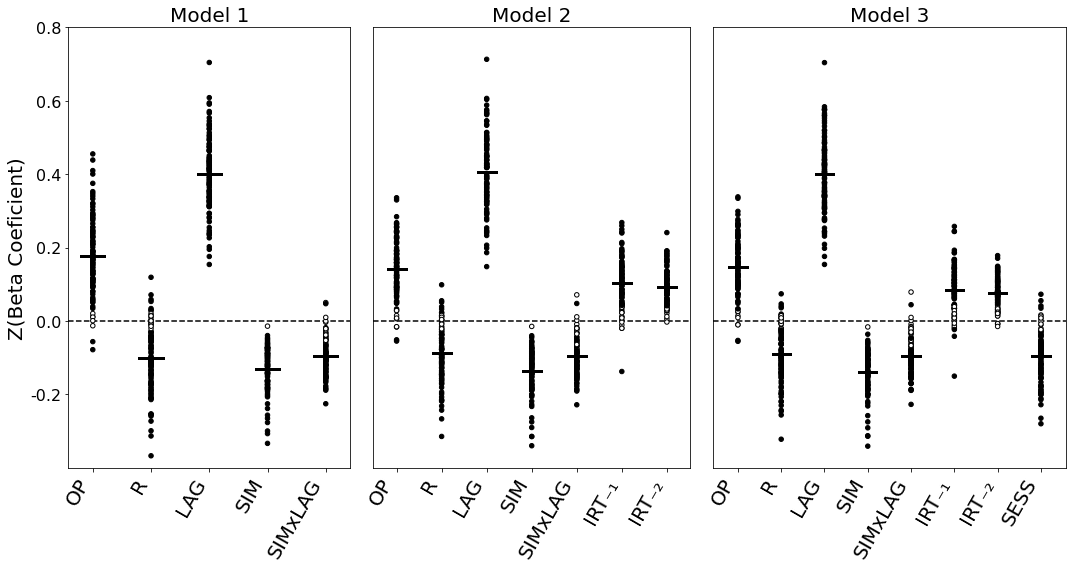

In [13]:
subjs = db.get_subjs()

fig, axes = plt.subplots(figsize=(15,8), ncols=3, gridspec_kw={'width_ratios': [4, 4.5, 5]})

hide_ylabels = False
for i, ax in enumerate(axes):
    betas, pvals, r2s = get_betas(subjs, model_num=i+1)
    relabel_betas(betas, pvals)
    beta_plot(ax, betas, pvals, hide_ylabels=hide_ylabels, title=f'Model {i+1}')
    hide_ylabels = True
fig.tight_layout()
fig.savefig('all_betas.pdf')

In [14]:
for i in range(3):
    betas, pvals, r2s = get_betas(subjs, model_num=i+1)
    relabel_betas(betas, pvals)
    print(f'MODEL {i+1}')
    display_results(betas, r2s)


MODEL 1


,mean,pval,CI
OP,0.177,1.325407e-29,0.021
R,-0.100,3.015587e-18,0.018
LAG,0.400,3.205356e-60,0.021
SIM,-0.131,3.910270e-38,0.012
SIMxLAG,-0.096,2.071475e-33,0.010
R^2,0.215,NaN,0.007



MODEL 2


,mean,pval,CI
OP,0.141,1.514350e-31,0.016
R,-0.087,6.381210e-19,0.015
LAG,0.407,1.476684e-60,0.021
SIM,-0.136,4.687733e-39,0.012
SIMxLAG,-0.097,2.849408e-33,0.010
IRT₋₁,0.102,3.522982e-26,0.014
IRT₋₂,0.093,2.701623e-35,0.009
R^2,0.244,NaN,0.006



MODEL 3


,mean,pval,CI
OP,0.148,3.729630e-32,0.016
R,-0.090,8.437234e-20,0.015
LAG,0.400,2.148533e-60,0.020
SIM,-0.138,4.029091e-40,0.012
SIMxLAG,-0.095,4.277325e-33,0.010
IRT₋₁,0.085,2.093016e-22,0.013
IRT₋₂,0.076,2.225660e-32,0.008
SESS,-0.094,6.413342e-24,0.014
R^2,0.255,NaN,0.006
